Data Preprocessing

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import keras 
import os 
import cv2
import warnings
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model    
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
pd_img_data = os.listdir('/Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip')
pd_img_data

['test', 'train', 'valid']

In [3]:
train_pd = "/Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip/train"
test_pd = "/Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip/test"
valid_df = "/Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip/valid"

In [4]:
print(train_pd,test_pd,valid_df)

/Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip/train /Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip/test /Users/AKANKSHA/Downloads/PD_Class_yolov8.v2i.clip/valid


In [5]:
x_train=[]
for folder in os.listdir(train_pd):
    sub_path=train_pd+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [6]:
x_test=[]
for folder in os.listdir(test_pd):
    sub_path=test_pd+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [7]:
x_val=[]
for folder in os.listdir(valid_df):
    sub_path=test_pd+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [8]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [9]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=20,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range=20,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [11]:
training_set = train_datagen.flow_from_directory(train_pd,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_pd,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(valid_df,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1120 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [12]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [13]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1120,), (320,), (160,))

Display Images

In [14]:
def show_img(image_generator, num_images=10):
    images, labels = image_generator.next()
    fig, axes = plt.subplots(1, num_images, figsize=(15,3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()

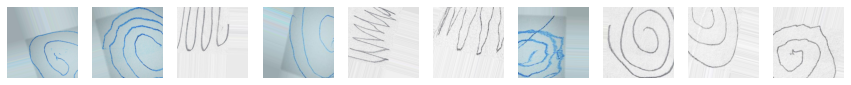

In [15]:
show_img(training_set)

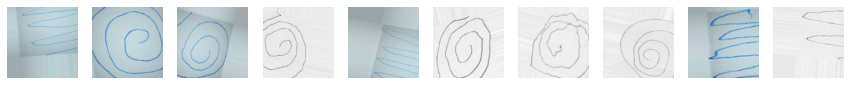

In [16]:
show_img(test_set)

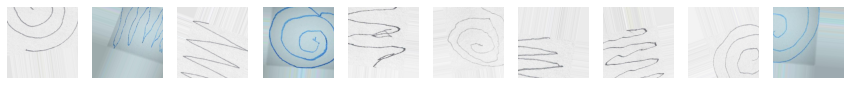

In [17]:
show_img(val_set)

Train InceptionV3

In [18]:
# Create InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87916544/87910968 [==============================] - 16s 0us/step


In [19]:
for layer in base_model.layers:
    layer.trainable = False

In [20]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

In [21]:
model = Model(inputs=base_model.input, outputs=output)

In [22]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(training_set, epochs=50, validation_data=val_set)

Epoch 1/50
35/35 [==============================] - 72s 2s/step - loss: 1.0805 - accuracy: 0.6464 - val_loss: 0.6048 - val_accuracy: 0.6875
Epoch 2/50
35/35 [==============================] - 64s 2s/step - loss: 0.5261 - accuracy: 0.7455 - val_loss: 0.5365 - val_accuracy: 0.7188
Epoch 3/50
35/35 [==============================] - 64s 2s/step - loss: 0.5146 - accuracy: 0.7348 - val_loss: 0.6039 - val_accuracy: 0.7125
Epoch 4/50
35/35 [==============================] - 64s 2s/step - loss: 0.5324 - accuracy: 0.7348 - val_loss: 0.4993 - val_accuracy: 0.7500
Epoch 5/50
35/35 [==============================] - 68s 2s/step - loss: 0.4895 - accuracy: 0.7723 - val_loss: 0.4792 - val_accuracy: 0.7812
Epoch 6/50
35/35 [==============================] - 62s 2s/step - loss: 0.4573 - accuracy: 0.7821 - val_loss: 0.4438 - val_accuracy: 0.8125
Epoch 7/50
35/35 [==============================] - 60s 2s/step - loss: 0.4578 - accuracy: 0.7893 - val_loss: 0.4455 - val_accuracy: 0.7812
Epoch 8/50
35/35 [==

In [24]:
test_eval = model.evaluate(test_set)

10/10 [==============================] - 15s 2s/step - loss: 0.4255 - accuracy: 0.8031


In [25]:
training_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Test Loss: {test_eval[0]:.4f}")
print(f"Test Accuracy: {test_eval[1] * 100:.2f}%")

Final Training Accuracy: 82.59%
Test Loss: 0.4255
Test Accuracy: 80.31%


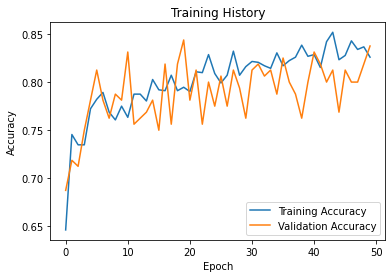

In [26]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()